<a href="https://colab.research.google.com/github/buthaina279/DS_Capstone_NLP/blob/main/classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Libraries

from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
from google.colab import drive  
#import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/datasets/new_datasets'

Mounted at /content/gdrive


In [211]:
airline = pd.read_csv("./gdrive/My Drive/datasets/new_datasets/airline.csv")

In [212]:
airline.sample(5)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text
1234,113,1336302148431335427,2020-12-08 13:30:34,"['americanairlines', 'dreamliner', 'boeing', '...",1,False,United Kingdom,en,#Americanairlines,americanairlines dreamliner boeing beauty
617,93,1336513614451257349,2020-12-09 03:30:51,"['still', 'buzzing', 'walking', 'underneath', ...",1,False,London,en,#britishairways,still buzzing walking underneath landor video ...
467,460,1335146244449075202,2020-12-05 08:57:25,"['dont', 'qatarairways', 'never', 'know', 'nex...",0,False,"Damascus, Syria",en,#qatarairways,dont qatarairways never know next victim justi...
13,15,1336172416582610944,2020-12-08 04:55:03,"['competition', 'watchdog', 'seek', 'public', ...",0,False,Singapore,en,#Singapore _Airlines,competition watchdog seek public feedback prop...
119,118,1335537274860294144,2020-12-06 10:51:14,"['virginatlantic', 'finished', 'thanks', 'sugg...",0,False,Israel 🇮🇱,en,#virginatlantic,virginatlantic finished thanks suggesting anyo...


#Lexicon-based Approach

This approach utilizes lexicon or dictionaries. In this step semantic orientation or polarity of words or phrases in the document are used in calculating the orientation for a document.

#TextBlob
When calculating sentiment for a single word, TextBlob uses a sophisticated technique known to mathematicians as “averaging”.

#Create a function to get the subjectivity

Opinions are usually subjective expressions that describe people’s sentiments, appraisals, or feelings toward entities, events, and their properties.

In [213]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity

Sentiment analysis is a method of identifying attitudes in text data about a subject of interest. It is scored using polarity values that range from 1 to -1. Values closer to 1 indicate more positivity, while values closer to -1 indicate more negativity.

In [214]:
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [215]:
# Create two new columns 'Subjectivity' & 'Polarity'
airline['subjectivity'] = airline['text'].apply(getSubjectivity)
airline['polarity'] = airline['text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
airline.head(5)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text,subjectivity,polarity
0,0,1337012314470457345,2020-12-10 12:32:30,"['singapore', 'airline', 'increase', 'india', ...",0,False,Taiwan,en,#Singapore _Airlines,singapore airline increase india vistara india...,0.0,0.00
1,1,1336883367103651841,2020-12-10 04:00:07,"['changi', 'ready', 'vaccine', 'distribution',...",0,False,"Central Region, Singapore",en,#Singapore _Airlines,changi ready vaccine distribution asia singapo...,0.5,0.35
2,2,1336659677971505153,2020-12-09 13:11:15,"['singapore', 'airline', 'strengthen', 'india'...",0,False,Taiwan,en,#Singapore _Airlines,singapore airline strengthen india vistara sin...,0.0,0.00
3,3,1336565658373373953,2020-12-09 06:57:39,"['jointly', 'together', 'changireadytaskforce'...",0,False,NaN,en,#Singapore _Airlines,jointly together changireadytaskforce governme...,0.0,0.00
4,4,1336548533856477184,2020-12-09 05:49:36,"['singapore', 'airline', 'vswh', 'boeing', 'ho...",2,False,NaN,en,#Singapore _Airlines,singapore airline vswh boeing hongkong interna...,0.0,0.00


In [216]:
def getPolarityPlot(polarity, airline):
   fig, ax = plt.subplots(figsize=(8, 6))

   # Plot histogram of the polarity values
   polarity.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
                 ax=ax,
                 color="purple")

   plt.title("Sentiments from Tweets on " +airline)
   plt.show()

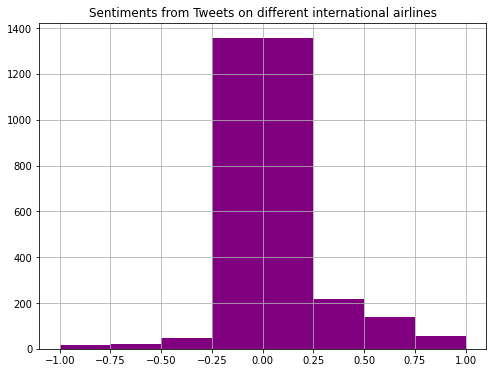

In [217]:
getPolarityPlot(airline['polarity'], "different international airlines")

It is clear that the majority of tweets have positive santiment(>0). However, it is almost normally distributed.

**??**

#Classify the tweets based on polarity value 

In [168]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [218]:
airline['sentiment'] = airline['polarity'].apply(getSentiment)

In [219]:
airline.sample(5)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text,subjectivity,polarity,sentiment
1194,70,1336539141702606849,2020-12-09 05:12:17,"['sign', 'normality', 'slowly', 'returning', '...",0,False,"Oxford, England",en,#Americanairlines,sign normality slowly returning airline lounge...,0.400000,-0.300,Negative
1324,233,1334654436321398796,2020-12-04 00:23:08,"['archive', 'post', 'flight', 'review', 'ameri...",0,False,Worldwide,en,#Americanairlines,archive post flight review american airline fi...,0.166667,0.125,Positive
562,19,1337073253152509952,2020-12-10 16:34:39,"['tribute', 'video', 'british', 'airway', 'boa...",17,False,"LOS ANGELES, CA",en,#britishairways,tribute video british airway boac retro livery...,0.000000,0.000,Neutral
1561,154,1335936047436468225,2020-12-07 13:15:48,"['possible', 'covid', 'exposure', 'aircanada',...",6,False,"Cape Breton, Nova Scotia",en,#AirCanada,possible covid exposure aircanada toronto sydn...,0.750000,0.250,Positive
1777,130,1335437970669768706,2020-12-06 04:16:38,"['sunset', 'unitedairlines', 'lounge', 'honolu...",0,False,Worldwide,en,#UnitedAirlines,sunset unitedairlines lounge honolulu never tw...,0.000000,0.000,Neutral


#remove words with less frequency(Outliers)

# visualizing the seniment

In [220]:
# Data balance
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst 
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

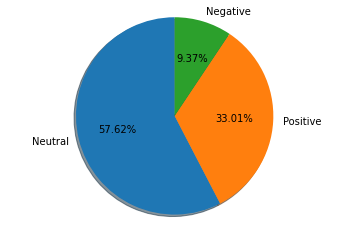

In [221]:
createPieChartFor(airline.sentiment)

# Printing positive tweets 

In [ ]:
print('Printing positive tweets:\n')
j=1
sortedDF = airline.sort_values(by=['polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['sentiment'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['text'][i])
    print()
    j= j+1


Printing positive tweets:

1) ['changi', 'ready', 'vaccine', 'distribution', 'asia', 'singapore', 'cargo', 'gear', 'safe', 'transportation']

2) ['full', 'service', 'private', 'airline', 'vistara', 'entered', 'commercial', 'cooperation', 'framework', 'agreement']

3) ['full', 'service', 'private', 'airline', 'vistara', 'entered', 'commercial', 'cooperation', 'framework', 'agreement']

4) ['catch', 'covid', 'flight', 'excellent', 'analysis', 'happen', 'emirate', 'newzealand']

5) ['coronavirus', 'singapore', 'airline', 'ready', 'fleet', 'shipping', 'vaccine', 'southkorea', 'capital', 'began', 'enforcing']

6) ['stunning', 'needed', 'beauty', 'sleep', 'flying', 'world', 'longest', 'flight']

7) ['arriving', 'early', 'morning', 'winter', 'light', 'avgeek']

8) ['stunning', 'needed', 'beauty', 'sleep', 'flying', 'world', 'longest', 'flight']

9) ['good', 'international', 'airline', 'started', 'operating', 'pakistan', 'pakistanmovingforward']

10) ['farewell', 'favorite', 'shot', 'taken']



# Printing negative tweets 

In [ ]:
 
print('Printing negative tweets:\n')
j=1
sortedDF = airline.sort_values(by=['polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['sentiment'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['text'][i])
    print()
    j=j+1

Printing negative tweets:

1) ['consumer', 'flight', 'booking', 'cancelled', 'airline', 'covid', 'refund', 'processed', 'goibibo', 'complaint', 'filed']

2) ['consumer', 'flight', 'booking', 'cancelled', 'airline', 'covid', 'refund', 'processed', 'goibibo', 'complaint']

3) ['singapore', 'airline', 'singapore', 'airline', 'expensive', 'year']

4) ['virgin', 'sell', 'reality', 'dramatic', 'opening', 'suggests', 'order', 'raise', 'cash', 'airlin']

5) ['virgin', 'sell', 'reality', 'dramatic', 'opening', 'suggests', 'order', 'raise', 'cash']

6) ['dead', 'others', 'hurt', 'west', 'virginia', 'chemical', 'facility', 'explosion', 'unclekjblog', 'virginatlantic', 'usaelections']

7) ['still', 'refund', 'disgusted', 'appalled', 'keep', 'people', 'money', 'long']

8) ['virginatlantic', 'flight', 'booked', 'january', 'unable', 'esta', 'advise']

9) ['extreme', 'closeup', 'airbus', 'gvjam', 'flight', 'virb', 'london', 'land', 'runway']

10) ['weird', 'virgin', 'atlantic', 'widebody', 'coming', '

#try

In [ ]:
def createWrdCloudForSentiment(sentiment):
    temp_df = airline[airline.sentiment==sentiment]
    words = temp_df.text
    return words
    

In [ ]:
words = createWrdCloudForSentiment('Positive')

In [ ]:
words

1       ['changi', 'ready', 'vaccine', 'distribution',...
14      ['full', 'service', 'private', 'airline', 'vis...
15      ['full', 'service', 'private', 'airline', 'vis...
22      ['catch', 'covid', 'flight', 'excellent', 'ana...
29      ['coronavirus', 'singapore', 'airline', 'ready...
                              ...                        
1840    ['seen', 'hemisphere', 'magazine', 'united', '...
1841    ['wingwednesday', 'window', 'seat', 'view', 'f...
1848    ['three', 'different', 'shot', 'sequence', 'fe...
1849    ['first', 'class', 'deadhead', 'seniority', 'r...
1856    ['united', 'airline', 'take', 'delivery', 'con...
Name: text, Length: 613, dtype: object

In [48]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
text_ex = 'changi ready vaccine distribution asia singapore cargo gear safe transportation'
blob = TextBlob(text_ex)
blob.tags 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('changi', 'NNS'),
 ('ready', 'JJ'),
 ('vaccine', 'JJ'),
 ('distribution', 'NN'),
 ('asia', 'NN'),
 ('singapore', 'NN'),
 ('cargo', 'NN'),
 ('gear', 'VBP'),
 ('safe', 'JJ'),
 ('transportation', 'NN')]

In [26]:
blob.sentences

[Sentence("consumer flight booking cancelled airline covid efund processed goibibo complaint filed")]

In [37]:
blob.words

WordList(['consumer', 'flight', 'booking', 'cancelled', 'airline', 'covid', 'efund', 'processed', 'goibibo', 'complaint', 'filed'])

In [29]:
blob.ngrams(1)

[WordList(['consumer']),
 WordList(['flight']),
 WordList(['booking']),
 WordList(['cancelled']),
 WordList(['airline']),
 WordList(['covid']),
 WordList(['efund']),
 WordList(['processed']),
 WordList(['goibibo']),
 WordList(['complaint']),
 WordList(['filed'])]

In [32]:
airline['try'] = airline.text.apply(lambda x: np.mean(
              [TextBlob(r[0]).sentiment.polarity for r in TextBlob(x).ngrams(1)]))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [ ]:
airline.sample(5)

In [36]:
from textblob import TextBlob
import pandas as pd
import statistics as s

df = pd.DataFrame({'text':['this is great!','how dare you?!']})
df['score'] = 0

for j in range(10):
    lst=[]
    i = text.text[j]
    d = TextBlob(i)
    words_list=d.words
    for i in words_list:
        f = TextBlob(i)
        print(f.sentiment)
        lst.append(f.sentiment.polarity)
    z = s.mean(lst)
    df['score'][j] = z

NameError: ignored

In [49]:
for sentence in blob.sentences:
    print(sentence.sentiment.polarity)

0.35


In [38]:
text_list = ['consumer', 'flight', 'booking', 'cancelled', 'airline', 'covid', 'refund', 'processed', 'goibibo', 'complaint', 'filed']
for word in blob.words:
  print(word.sentiment.polarity)


AttributeError: ignored

In [39]:
blob.words.sentiment.polarity

AttributeError: ignored

#Get the positive reason

In [127]:
text_list = ['changi', 'ready', 'vaccine', 'distribution', 'asia', 'singapore', 'cargo', 'gear', 'safe', 'transportation']
for i in text_list:
    # Not sure what is in common_words, but it needs to be a string
    polarity = TextBlob(i).sentiment.polarity
    if polarity != 0:
      print(i,polarity)


ready 0.2
safe 0.5


In [ ]:
for i in text_list:
    # Not sure what is in common_words, but it needs to be a string
    polarity = TextBlob(i).sentiment.polarity
    if polarity != 0:
      airline['reason']= i

#Get the words for positive and negative sentiment

In [223]:
#transform from "str" to list
airline["list_text"] = airline["text"].apply(eval)

In [224]:
airline['reason']= ''
for index, airline_list in enumerate(airline['list_text']):
  reasons_list = []
  for word in airline_list:
    polarity = TextBlob(word).sentiment.polarity
    if polarity != 0:
      reasons_list.append(word)
    airline['reason'][index]= reasons_list

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [225]:
airline.sample(10)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text,subjectivity,polarity,sentiment,list_text,reason
1078,216,1335306003634671626,2020-12-05 19:32:14,"['turkishairlines', 'friendly', 'tеrrог', 'exp...",5,False,NaN,en,#turkishairlines,turkishairlines friendly tеrrог exporter name ...,0.50,0.3375,Positive,"[turkishairlines, friendly, tеrrог, exporter, ...","[friendly, fresh]"
242,19,1337073162203312129,2020-12-10 16:34:18,"['qatarairways', 'ashamed', 'supervisor', 'fin...",0,False,Somewhere around,en,#qatarairways,qatarairways ashamed supervisor fined call lad...,0.00,0.0000,Neutral,"[qatarairways, ashamed, supervisor, fined, cal...",[]
199,325,1334455867438141440,2020-12-03 11:14:06,"['avgeek', 'photo', 'posted', 'facebook', 'pag...",1,False,"London, England",en,#virginatlantic,avgeek photo posted facebook page click link t...,0.00,0.0000,Neutral,"[avgeek, photo, posted, facebook, page, click,...",[]
354,202,1336434232286130176,2020-12-08 22:15:25,"['qatarairways', 'announces', 'seattle', 'next...",0,False,Germany,en,#qatarairways,qatarairways announces seattle next destination,0.00,0.0000,Neutral,"[qatarairways, announces, seattle, next, desti...",[]
1782,135,1335371418549227522,2020-12-05 23:52:10,"['moonrise', 'seen', 'united', 'atlantic', 'oc...",0,False,"Nashville, TN",en,#UnitedAirlines,moonrise seen united atlantic ocean summer bac...,0.00,0.0000,Neutral,"[moonrise, seen, united, atlantic, ocean, summ...",[]
276,61,1336950006322892801,2020-12-10 08:24:55,"['launch', 'flight', 'seattle', 'march', 'qata...",0,False,Worldwide,en,#qatarairways,launch flight seattle march qatar pandemic avi...,0.00,0.0000,Neutral,"[launch, flight, seattle, march, qatar, pandem...",[]
264,49,1336996583829884929,2020-12-10 11:30:00,"['ballet', 'football', 'sustainability', 'cons...",35,False,"Doha, Qatar",en,#qatarairways,ballet football sustainability conservation sc...,0.00,0.0000,Neutral,"[ballet, football, sustainability, conservatio...",[]
257,41,1337024902201810944,2020-12-10 13:22:32,"['thrilled', 'welcome', 'jabeur', 'qatarairway...",0,False,Tunisie,en,#qatarairways,thrilled welcome jabeur qatarairways family br...,0.80,0.7000,Positive,"[thrilled, welcome, jabeur, qatarairways, fami...","[thrilled, welcome]"
1184,58,1336671821249339394,2020-12-09 13:59:31,"['hopped', 'plane', 'losangeles', 'laxairport'...",0,False,"Buenos Aires, Argentina",en,#Americanairlines,hopped plane losangeles laxairport americanair...,0.00,0.0000,Neutral,"[hopped, plane, losangeles, laxairport, americ...",[]
350,196,1336472317153734656,2020-12-09 00:46:45,"['qatarairways', 'pleased', 'announce', 'frequ...",0,False,"Duino-Aurisina, Friuli-Venezia",en,#qatarairways,qatarairways pleased announce frequent flyer p...,0.65,0.3000,Positive,"[qatarairways, pleased, announce, frequent, fl...","[pleased, frequent]"


#try

In [ ]:
for i, l in enumerate(airline["test1"]):
    print("list",i,"is",type(l))

In [20]:
import nltk
nltk.download('brown')
blob.noun_phrases 

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


WordList(['consumer flight', 'airline covid efund', 'goibibo complaint'])

#Save the data set

In [226]:
airline.to_csv('airline_classified.csv')
!cp airline_classified.csv "./gdrive/My Drive/datasets/new_datasets/"